In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import math
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ML PROJECT/DATA FILE/ML EL Dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Karnataka,Hassan,Arasikere,Local,Cereals,5.0,2690.0,2690.0,2690.0,5/26/2022
1,Karnataka,Hassan,Arasikere,Local,Cereals,4.0,2725.0,2725.0,2725.0,4/19/2022
2,Karnataka,Hassan,Arasikere,Local,Cereals,3.0,2950.0,2950.0,2950.0,3/24/2022
3,Karnataka,Hassan,Arasikere,Local,Cereals,8.0,2490.0,2835.0,2700.0,3/11/2022
4,Karnataka,Hassan,Arasikere,Local,Cereals,2.0,2411.0,2411.0,2411.0,2/18/2022


In [ ]:
df.drop(['market_center_name', 'Variety', 'group_name', 'Arrival', 'MIN', 'MAX','state_name', 'district_name'],axis = 1, inplace = True)
df['date_arrival']=pd.to_datetime(df['date_arrival'])
df['month'] = pd.DatetimeIndex(df['date_arrival']).month
df['year'] = pd.DatetimeIndex(df['date_arrival']).year
df = df.groupby(['date_arrival'])['MODAL'].mean().to_frame(name = 'price').reset_index()
df

,date_arrival,price
0,2001-08-01,1000.000000
1,2001-08-02,1115.000000
2,2001-08-03,1000.000000
3,2001-08-04,1000.000000
4,2001-08-06,1000.000000
...,...,...
6649,2022-07-03,2500.000000
6650,2022-07-04,2640.571429
6651,2022-07-05,2543.428571
6652,2022-07-06,2427.714286


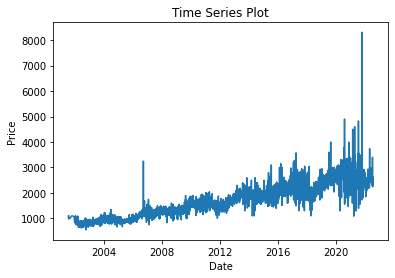

In [ ]:
plt.plot(df.date_arrival, df.price)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
df.loc[df['price']>5000]
df.drop(6416, axis = 0, inplace = True)
df.loc[df['price']>3000]
df.drop(1592, axis = 0, inplace = True)

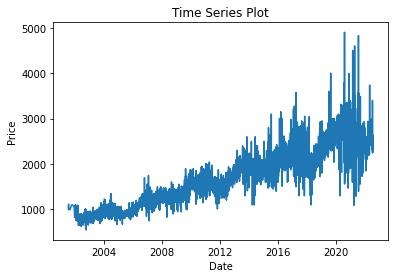

In [ ]:
plt.plot(df.date_arrival, df.price)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
scaler = MinMaxScaler()
df1 = df['price'].to_numpy()
df1 = df1.reshape(-1,1)
df1 = scaler.fit_transform(df1)
df['scaled_price'] = df1

In [ ]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
x = df['date_arrival']
y = df['scaled_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = False)
train = pd.DataFrame()
test = pd.DataFrame()
train['arrival'] = x_train
train['scaled_price'] = y_train
train.set_index(train['arrival'])
train.drop('arrival', axis = 1, inplace = True)
test['arrival'] = x_test
test['scaled_price'] = y_test
test.set_index(test['arrival'])
test.drop('arrival', axis = 1, inplace = True)
test.to_numpy()
train.to_numpy()
time_step = 128
x_train, y_train = create_dataset(train.values, time_step)
x_test, y_test = create_dataset(test.values, time_step)
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(128,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Epoch 1/100
82/82 [==============================] - 25s 245ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 2/100
82/82 [==============================] - 21s 253ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 3/100
82/82 [==============================] - 19s 232ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 4/100
82/82 [==============================] - 19s 230ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 5/100
82/82 [==============================] - 19s 232ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 6/100
82/82 [==============================] - 19s 231ms/step - loss: 0.0012 - val_loss: 0.0052
Epoch 7/100
82/82 [==============================] - 19s 232ms/step - loss: 0.0013 - val_loss: 0.0063
Epoch 8/100
82/82 [==============================] - 19s 232ms/step - loss: 0.0013 - val_loss: 0.0052
Epoch 9/100
82/82 [==============================] - 21s 252ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 10/100
82/82 [==============================] - 19s 232ms/step - loss: 0.001

In [ ]:
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)
y_train=scaler.inverse_transform(y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_predict)
rmse = math.sqrt(mse)
print('RMSE:',rmse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,test_predict)
print('MAE:',mae)

from sklearn.metrics import r2_score
print('R-squared Error',r2_score(y_test, test_predict))

RMSE: 318.8464788917118
MAE: 217.2102301825927
R-squared Error 0.09165692370931411


In [ ]:
dates = df['date_arrival']
dates_train, dates_test = train_test_split(dates, test_size=0.2, shuffle = False)
dates_test = dates_test.to_numpy()
dates_test = dates_test.reshape(-1,1)
dates_train = dates_train.to_numpy()
dates_train = dates_train.reshape(-1,1)
x1_test, y1_test = create_dataset(dates_test, time_step)
x1_train, y1_train = create_dataset(dates_train, time_step)

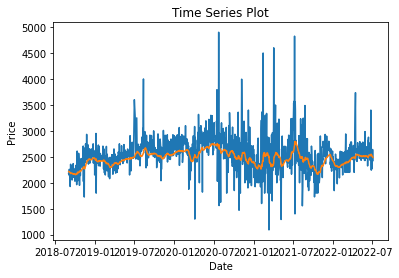

In [ ]:
plt.plot(y1_test,y_test)
plt.plot(y1_test, test_predict)
plt.plot()
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'Price')

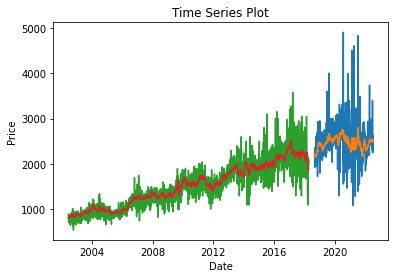

In [ ]:
plt.plot(y1_test,y_test)
plt.plot(y1_test, test_predict)
plt.plot(y1_train, y_train)
plt.plot(y1_train, train_predict)
#plt.plot(x1_test, x_test)
#plt.plot(x1_train, x_train)
plt.plot()
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Price')

In [ ]:
print(x1_test, x1_train)

In [ ]:
x1_test.reshape(-1,1).shape
x1_train.reshape(-1,1).shape

In [ ]:
x_test.shape

(1202, 128)